# Problem Statement
The analysis look to understand key patterns in Airbnb Listings competitive market in Bangkok from any realistic angle. This analysis lookinng for insight to see where adjustments and identify guest experience might elevate any potential improvements.

# CAPSTONE PROJECT 2 
**(Airbnb Listings Bangkok Dataset)**

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

**Importing Data**

In [263]:
airbnb_df = pd.read_csv(r'/Users/sheilasmacbook/Documents/DTI DS Purwadhika/Capstone Project/CapsPro2/Airbnb Listings Bangkok.csv')
display(airbnb_df.head(),airbnb_df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


# Data Understanding

In [264]:
print(f'Total row and column of Airbnb Listings Bangkok dataset is {airbnb_df.shape}')
airbnb_df.info()

Total row and column of Airbnb Listings Bangkok dataset is (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews     

**Checking Duplicates**

In [265]:
airbnb_df.duplicated().sum()

0

**Set last_review feature into datetime**

In [266]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

**Checking unique data**

In [267]:
airbnb_df.nunique()

Unnamed: 0                        15854
id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

**Checking Null**

In [268]:
airbnb_df.isna().mean()*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [269]:
print(airbnb_df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna().sum())

name                    8
host_name               1
last_review          5790
reviews_per_month    5790
dtype: int64


In [270]:
airbnb_df.loc[:, airbnb_df.isna().any()]

,name,host_name,last_review,reviews_per_month
0,Nice room with superb city view,Nuttee,2020-01-06,0.50
1,"Easy going landlord,easy place",Emy,NaT,NaN
2,modern-style apartment in Bangkok,Familyroom,NaT,NaN
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,2022-04-01,0.03
4,Suite Room 3 at MetroPoint,Kasem,NaT,NaN
...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,NaT,NaN
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Phakhamon,NaT,NaN
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,NaT,NaN
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,NaT,NaN


<Axes: >

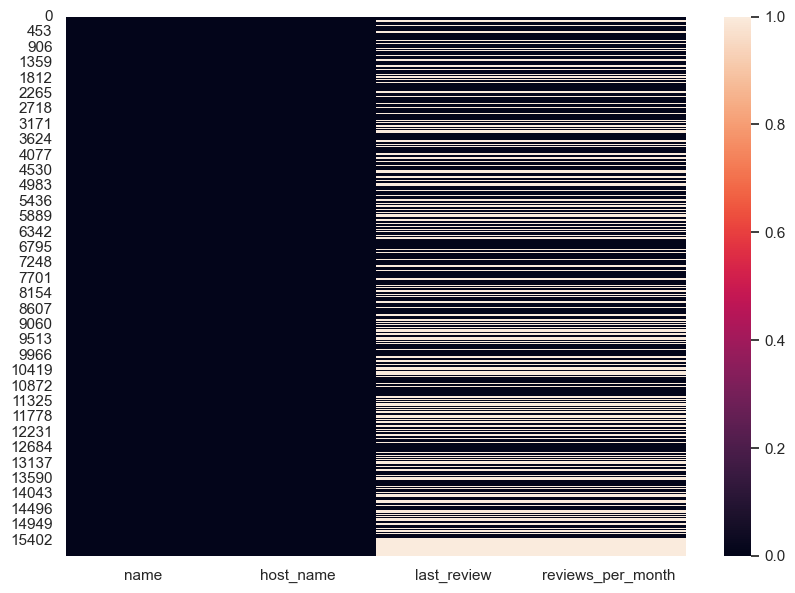

In [271]:
# missing value spread in the data
plt.figure(figsize=(10,7))
sns.heatmap(airbnb_df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

# OUTLIERS

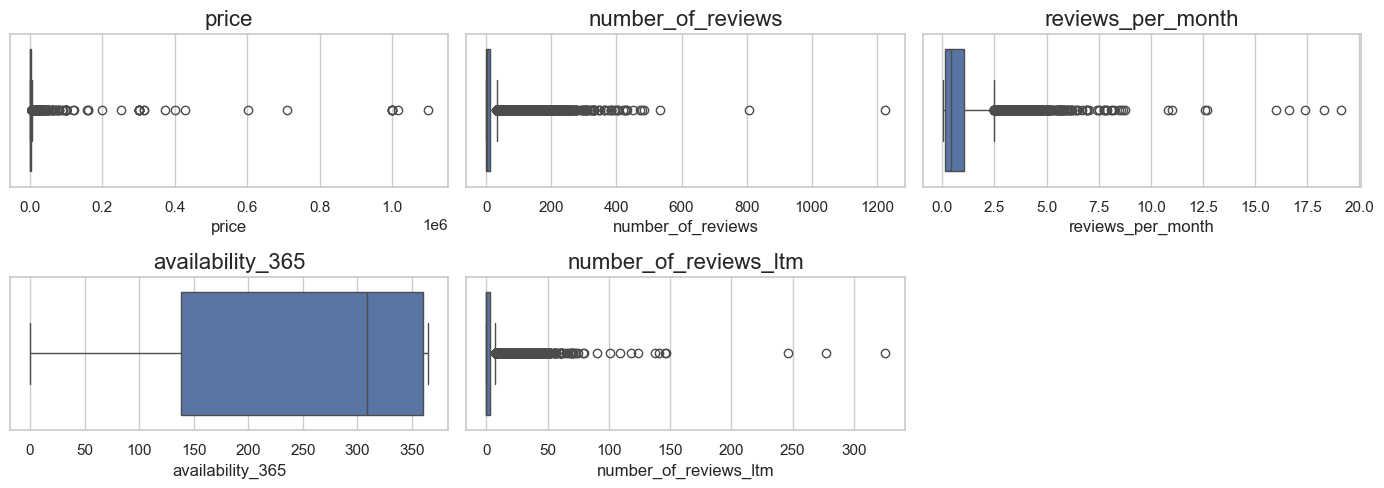

In [337]:
airbnb_feature = airbnb_df[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']]

plt.figure(figsize=(14,7))
plotnumber = 1
for feature in airbnb_feature:
    axis = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=airbnb_df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

by the result above, we can see that the feature that we need to handle the outliers are price, number_of_reviews, reviews_per_month, number_of_reviews_ltm

In [273]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = airbnb_feature.quantile(0.25)
Q3 = airbnb_feature.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate Q2 (median)
Q2 = airbnb_feature.median()

print(f"\nQ1: {Q1}, \nQ2 (Median): {Q2}, \nQ3: {Q3}, IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (airbnb_feature < lower_bound) | (airbnb_feature > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers in the column:\n {num_outliers}")

outliers_df = airbnb_feature[outliers.any(axis=1)]
print(f"Number of rows with outliers: {len(outliers_df)}")


Q1: price                    900.00
number_of_reviews          0.00
reviews_per_month          0.12
availability_365         138.00
number_of_reviews_ltm      0.00
Name: 0.25, dtype: float64, 
Q2 (Median): price                    1429.000
number_of_reviews           2.000
reviews_per_month           0.435
availability_365          309.000
number_of_reviews_ltm       0.000
dtype: float64, 
Q3: price                    2429.00
number_of_reviews          13.00
reviews_per_month           1.06
availability_365          360.00
number_of_reviews_ltm       3.00
Name: 0.75, dtype: float64, IQR: price                    1529.00
number_of_reviews          13.00
reviews_per_month           0.94
availability_365          222.00
number_of_reviews_ltm       3.00
dtype: float64
Number of outliers in the column:
 price                    1403
number_of_reviews        2240
reviews_per_month         693
availability_365            0
number_of_reviews_ltm    2219
dtype: int64
Number of rows with outlie

# Data Cleaning

**Copy raw dataframe into new dataframe to clean**

In [274]:
airbnb2_df = airbnb_df.copy()

**Handling Outliers**

In [275]:
#Replace 0 price with 1st quartile price
P1_prc = airbnb2_df['price'].quantile(0.25)
airbnb2_df['price'] = np.where(airbnb2_df['price'] == 0, P1_prc, airbnb2_df['price'])

#Capping high price to reduce extreme values
P4_prc = airbnb2_df['price'].quantile(0.95)
airbnb2_df['price'] = np.where(airbnb2_df['price'] > P4_prc, P4_prc, airbnb2_df['price'])

#Capping number of reviews to reduce extreme values
P4_rvw = airbnb2_df['number_of_reviews'].quantile(0.95)
airbnb2_df['number_of_reviews'] = np.where(airbnb2_df['number_of_reviews'] > P4_rvw, P4_rvw, airbnb2_df['number_of_reviews'])

#Capping reviews per month to reduce extreme values
P4_rvm = airbnb2_df['reviews_per_month'].quantile(0.95)
airbnb2_df['reviews_per_month'] = np.where(airbnb2_df['reviews_per_month'] > P4_rvm, P4_rvm, airbnb2_df['reviews_per_month'])
airbnb2_df['reviews_per_month_sqrt'] = np.sqrt(airbnb2_df['reviews_per_month'])

#Capping reviews last 12 months to reduce extreme values
P4_ltm = airbnb2_df['number_of_reviews_ltm'].quantile(0.95)
airbnb2_df['number_of_reviews_ltm'] = np.where(airbnb2_df['number_of_reviews_ltm'] > P4_ltm, P4_ltm, airbnb2_df['number_of_reviews_ltm'])
airbnb2_df['number_of_reviews_ltm_sqrt'] = np.sqrt(airbnb2_df['number_of_reviews_ltm'])

print('Rows before outliers: ', len(airbnb_df))
print('Rows after dropping outliers: ', len(airbnb2_df))

Rows before outliers:  15854
Rows after dropping outliers:  15854


In [276]:
airbnb2_df.shape

(15854, 19)

In [277]:
airbnb2_df.head(10)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905.0,3,65.0,2020-01-06,0.50,2,353,0.0,0.707107,0.0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316.0,1,0.0,NaT,NaN,2,358,0.0,NaN,0.0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0.0,NaT,NaN,1,365,0.0,NaN,0.0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286.0,7,2.0,2022-04-01,0.03,1,323,1.0,0.173205,1.0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905.0,1,0.0,NaT,NaN,3,365,0.0,NaN,0.0
5,5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000.0,250,19.0,2017-08-03,0.17,41,365,0.0,0.412311,0.0
6,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558.0,3,1.0,2014-02-03,0.01,1,365,0.0,0.100000,0.0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461.0,1,0.0,NaT,NaN,1,365,0.0,NaN,0.0
8,8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558.0,3,10.0,2016-03-29,0.09,1,365,0.0,0.300000,0.0
9,9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700.0,2,4.0,2019-12-27,0.03,10,87,0.0,0.173205,0.0


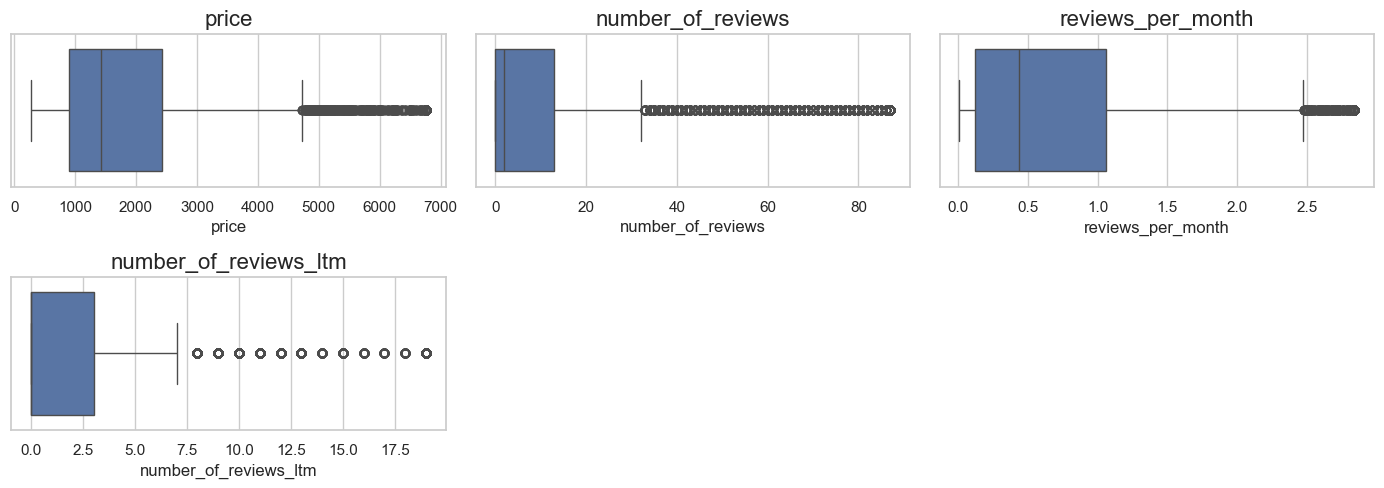

In [338]:
airbnb2_feature = airbnb2_df[['price', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]


plt.figure(figsize=(14,7))
plotnumber = 1
for feature in airbnb2_feature:
    axis = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=airbnb2_df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

In [279]:
# Standardize string columns for consistency
airbnb2_df['name'] = airbnb2_df['name'].str.strip().str.title()
airbnb2_df['host_name'] = airbnb2_df['host_name'].str.strip().str.title()
airbnb2_df['neighbourhood'] = airbnb2_df['neighbourhood'].str.strip().str.title()
airbnb2_df['room_type'] = airbnb2_df['room_type'].str.strip().str.title()

# Clean symbols in the 'name' column
def clean_name(name):
    return re.sub(r'[^A-Za-z0-9\s]+', '', name).strip()

airbnb2_df['name'] = airbnb2_df['name'].apply(lambda x: clean_name(x) if isinstance(x, str) else x)

**Drop Null Data**

In [280]:
airbnb2_df.isna().mean()*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
reviews_per_month_sqrt            36.520752
number_of_reviews_ltm_sqrt         0.000000
dtype: float64

**Drop Empty Row (unwanted)**

In [282]:
airbnb2_df = airbnb2_df.dropna(subset=['name', 'host_name'])
airbnb2_df.shape

(15845, 19)

**Filling Null Data**

In [283]:
airbnb2_df.fillna({'last_review' : pd.to_datetime('NaT'), 
                   'reviews_per_month' : pd.to_numeric(airbnb2_df['reviews_per_month'], errors='coerce')})

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
0,0,27934,Nice Room With Superb City View,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire Home/Apt,1905.0,3,65.0,2020-01-06,0.50,2,353,0.0,0.707107,0.0
1,1,27979,Easy Going LandlordEasy Place,120541,Emy,Bang Na,13.668180,100.616740,Private Room,1316.0,1,0.0,NaT,NaN,2,358,0.0,NaN,0.0
2,2,28745,ModernStyle Apartment In Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private Room,800.0,60,0.0,NaT,NaN,1,365,0.0,NaN,0.0
3,3,35780,Spacious One Bedroom At The Kris Condo Bldg 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private Room,1286.0,7,2.0,2022-04-01,0.03,1,323,1.0,0.173205,1.0
4,4,941865,Suite Room 3 At Metropoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private Room,1905.0,1,0.0,NaT,NaN,3,365,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,42Btson Nut,94899359,Renee,Pra Wet,13.715132,100.653458,Private Room,2298.0,28,0.0,NaT,NaN,1,362,0.0,NaN,0.0
15850,15850,790474503157243541,Euro Luxuryhotel Pratunammkt Triplebdnrshoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private Room,1429.0,1,0.0,NaT,NaN,14,365,0.0,NaN,0.0
15851,15851,790475335086864240,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private Room,1214.0,1,0.0,NaT,NaN,14,365,0.0,NaN,0.0
15852,15852,790475546213717328,Euro Luxuryhotel Pratunammkt Twinbednrshopingarea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private Room,1214.0,1,0.0,NaT,NaN,14,365,0.0,NaN,0.0


**Save the Clean Data into New CSV**

In [286]:
airbnb2_df.to_csv('Airbnb Bangkok Clean.csv', index=False)
airbnb2_df.to_excel('Airbnb Bangkok Clean.xlsx', index=False)

# EDA

In [287]:
airbnb2_df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
count,15845.000000,1.584500e+04,1.584500e+04,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,10061,10061.000000,15845.000000,15845.000000,15845.000000,10061.000000,15845.000000
mean,7930.259072,1.580294e+17,1.541645e+08,13.745148,100.559895,1974.748608,15.299905,13.196024,2021-08-30 19:10:44.428983040,0.747455,13.896813,244.319281,2.826759,0.734632,0.973992
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000,0.100000,0.000000
25%,3970.000000,2.104514e+07,3.974431e+07,13.720090,100.529690,900.000000,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000,0.346410,0.000000
50%,7931.000000,3.505717e+07,1.224556e+08,13.738490,100.561400,1429.000000,1.000000,2.000000,2022-10-24 00:00:00,0.440000,4.000000,309.000000,0.000000,0.663325,0.000000
75%,11892.000000,5.258780e+07,2.392258e+08,13.759490,100.585140,2429.000000,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000,1.029563,1.732051
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,6761.900000,1125.000000,87.000000,2022-12-28 00:00:00,2.840000,228.000000,365.000000,19.000000,1.685230,4.358899
std,4575.323803,2.946611e+17,1.318845e+08,0.043044,0.050915,1611.650684,50.828453,23.460809,NaN,0.805355,30.276935,125.849614,5.199294,0.455840,1.370481


In [289]:
#top 5 by number of reviews
airbnb2_df.sort_values(by="number_of_reviews", ascending=False).head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
1343,1343,10145690,Neat Little Apartment In Great Area,5792836,Rogier,Khlong Toei,13.72635,100.56033,Entire Home/Apt,795.0,3,87.0,2022-12-16,1.27,1,60,19.0,1.126943,4.358899
1319,1319,10109234,Lux Cbd 4 Beds Suite 1Minbts FreewifiPool 175Sqm,39744308,Ed,Bang Rak,13.72452,100.53065,Entire Home/Apt,3983.0,1,87.0,2022-11-23,2.32,12,294,18.0,1.523155,4.242641
7715,7715,34070414,Apt476 2Nd Fl 2 Bdr 1Min Walk To Subway,14335043,Tan,Parthum Wan,13.73840,100.51786,Entire Home/Apt,4101.0,1,87.0,2022-12-24,2.84,14,109,19.0,1.685230,4.358899
3499,3499,19065395,Assembly Hostel Triple Room No3,53512783,Win,Bang Kho Laen,13.70822,100.51021,Private Room,850.0,1,87.0,2020-02-28,2.06,3,132,0.0,1.435270,0.000000
4975,4975,25057044,Refurbished 2 Bedroom Retreat With Pool Access,420188,Baker,Vadhana,13.73017,100.57244,Entire Home/Apt,4280.0,3,87.0,2022-12-24,2.02,9,23,19.0,1.421267,4.358899


In [290]:
#top 5 by reviews per month
airbnb2_df.sort_values(by="reviews_per_month", ascending=False).head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
1842,1842,12049269,FiveStar ResortLike Condo In Bkk,12464021,Rebecca,Huai Khwang,13.76044,100.56944,Entire Home/Apt,2885.0,4,87.0,2022-12-04,2.84,21,93,19.0,1.68523,4.358899
13688,13688,688888221862637270,6Bts Thong Lo 700M,402093105,Hi Gravity,Khlong Toei,13.72411,100.57335,Entire Home/Apt,1581.0,7,16.0,2022-12-13,2.84,45,241,16.0,1.68523,4.000000
13775,13775,700802489075363990,NearbtsFastwifiCheckin24HGymBigpoolSauna,251620538,Max,Khlong Toei,13.71839,100.57733,Entire Home/Apt,1300.0,3,8.0,2022-12-25,2.84,8,334,8.0,1.68523,2.828427
1121,1121,8654051,Bangkok Silom Private Gathering Place Air3Nity,13282564,Inthanom,Bang Rak,13.72530,100.52950,Entire Home/Apt,4734.0,1,87.0,2022-12-12,2.84,6,194,15.0,1.68523,3.872983
13772,13772,700372986154932709,CitycenterEmquartierBts Phrom Phong Newhouse,243654968,Viia,Vadhana,13.73182,100.57616,Entire Home/Apt,6761.9,1,16.0,2022-12-05,2.84,6,217,16.0,1.68523,4.000000


In [291]:
#top 5 by price
airbnb2_df.sort_values(by="price", ascending=False).head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,reviews_per_month_sqrt,number_of_reviews_ltm_sqrt
12268,12268,53906141,7D3Bedrooms2Baths Near MrtBts Downtown Bangkok,30262097,Dr. Supot,Vadhana,13.746123,100.558868,Entire Home/Apt,6761.9,2,12.0,2022-11-28,0.98,15,175,11.0,0.989949,3.316625
12920,12920,633597560359746315,Two Bedroom Residence With Balcony And Bath Tub,340150263,Bandara,Bang Rak,13.725804,100.538231,Private Room,6761.9,1,2.0,2022-08-12,0.38,18,359,2.0,0.616441,1.414214
3916,3916,20371084,Five Deluxe Bedroom Suite In China Town,145286178,Pok,Samphanthawong,13.739910,100.509650,Hotel Room,6761.9,1,0.0,NaT,NaN,4,364,0.0,NaN,0.000000
3911,3911,21045109,Head Into Bangkok From A Chic Home,68154488,Dusadee,Parthum Wan,13.735710,100.541980,Private Room,6761.9,1,17.0,2022-11-16,0.28,62,332,11.0,0.529150,3.316625
12897,12897,619948426650208690,Large 4 Bedroom Private Pool Villa Thonglorekk...,2076086,Caspar,Vadhana,13.727844,100.591187,Entire Home/Apt,6761.9,1,45.0,2022-12-19,2.84,1,352,19.0,1.685230,4.358899


**Correlation of the Data**

In [292]:
airbnb2_df.corr(numeric_only=True)[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
Unnamed: 0,0.056435,-0.336213,0.314855,0.151283,0.015649,0.066285
id,0.036803,-0.231444,0.428189,0.080953,0.123426,-0.008289
host_id,0.041638,-0.256907,0.068334,0.020421,0.033596,-0.070992
latitude,-0.069642,-0.030396,-0.040710,-0.044121,0.008946,-0.067874
longitude,-0.035692,-0.042029,-0.027079,-0.043764,-0.018113,-0.029632
price,1.000000,-0.018650,0.083981,0.020947,0.015778,0.031208
minimum_nights,-0.037542,-0.043149,-0.101323,-0.053662,0.053309,-0.102502
number_of_reviews,-0.018650,1.000000,0.528582,0.066050,-0.113355,0.580755
reviews_per_month,0.083981,0.528582,1.000000,0.099529,-0.033252,0.648613
calculated_host_listings_count,0.020947,0.066050,0.099529,1.000000,0.008747,0.169330


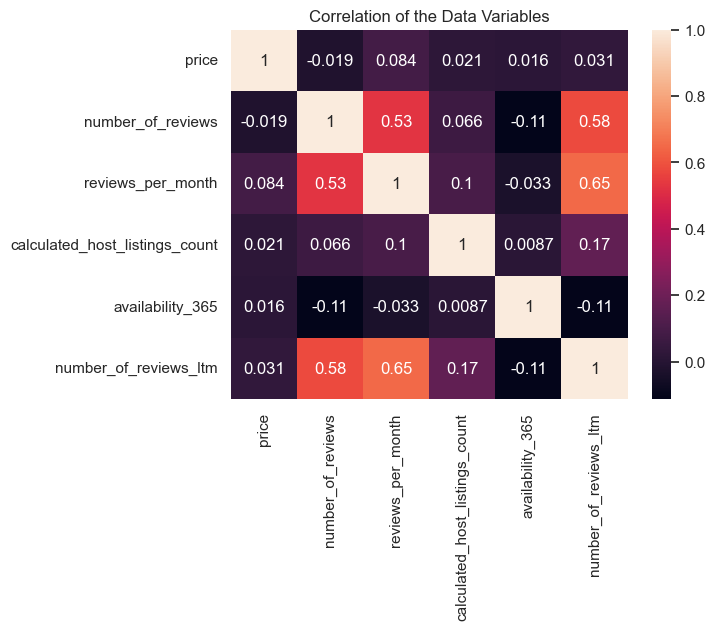

In [293]:
#correlation of the data
corr_data = airbnb2_df[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
sns.heatmap(corr_data, annot=True)
plt.title("Correlation of the Data Variables")
plt.show()

**Grouping Price**

In [294]:
P1 = airbnb2_df['price'].quantile(0.25)
P2 = airbnb2_df['price'].quantile(0.5)
P3 = airbnb2_df['price'].quantile(0.75)

prc_range = [0, P1, P2, P3, airbnb2_df['price'].max()]
prc_labels = ['Low', 'Low-Mid', 'Upper-Mid', 'High']
airbnb2_df['price_group'] = pd.cut(airbnb2_df['price'], bins=prc_range, labels=prc_labels)
print(airbnb2_df['price_group'].value_counts())

price_group
Low          4102
High         3961
Upper-Mid    3953
Low-Mid      3829
Name: count, dtype: int64


**Mean Values of Relevant Features for Each Price Group**

In [339]:
ft_price = airbnb2_df.groupby('price_group').agg({
    'price' : 'mean',
    'availability_365' : 'mean',
    'number_of_reviews' : 'mean',
    'number_of_reviews_ltm' : 'mean'
}).reset_index().round(0)
print('\nMean Values of Each Price Group:')
print(ft_price)


Mean Values of Each Price Group:
  price_group   price  availability_365  number_of_reviews  \
0         Low   665.0             248.0               13.0   
1     Low-Mid  1153.0             240.0               13.0   
2   Upper-Mid  1808.0             245.0               15.0   
3        High  4293.0             244.0               12.0   

   number_of_reviews_ltm  
0                    2.0  
1                    3.0  
2                    4.0  
3                    3.0  


**Grouping Neighbourhood**

In [298]:
nbd_group = airbnb2_df['neighbourhood'].value_counts()
nbd_group

neighbourhood
Vadhana                 2151
Khlong Toei             2096
Huai Khwang             1125
Ratchathewi             1113
Bang Rak                 827
Sathon                   809
Phra Nakhon              619
Phra Khanong             557
Chatu Chak               548
Bang Na                  457
Parthum Wan              455
Din Daeng                443
Phaya Thai               422
Suanluang                382
Khlong San               357
Bang Kapi                259
Bang Sue                 250
Bang Phlat               216
Yan Na Wa                200
Thon Buri                182
Don Mueang               167
Pra Wet                  156
Phasi Charoen            155
Bangkok Noi              152
Lat Krabang              149
Bang Kho Laen            140
Lak Si                   126
Pom Prap Sattru Phai     123
Bang Khen                116
Samphanthawong           114
Wang Thong Lang          100
Bang Khae                 92
Dusit                     91
Bangkok Yai               90


**Top 10 Host with multiple listings**

In [303]:
host_listings = airbnb2_df['host_name'].value_counts().head(10)
host_listings


host_name
Curry       228
Noons        99
K            91
Pornchai     63
Alex         62
Bee          62
Dusadee      62
Ed           60
Nana         57
Ludoping     56
Name: count, dtype: int64

**Average price per room**

In [299]:
avgprice_room = airbnb2_df.groupby('room_type')['price'].mean()
avgprice_room

room_type
Entire Home/Apt    2109.997767
Hotel Room         2330.763945
Private Room       1833.349653
Shared Room         786.376864
Name: price, dtype: float64

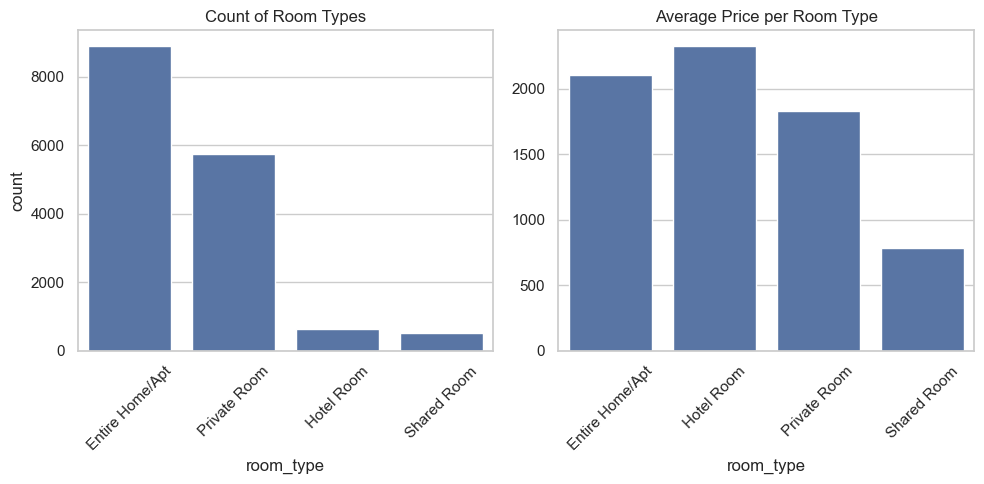

In [318]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=airbnb2_df, x='room_type')
plt.title("Count of Room Types")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=avgprice_room.index, y=avgprice_room.values)
plt.title("Average Price per Room Type")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Listings per Neighbourhood**

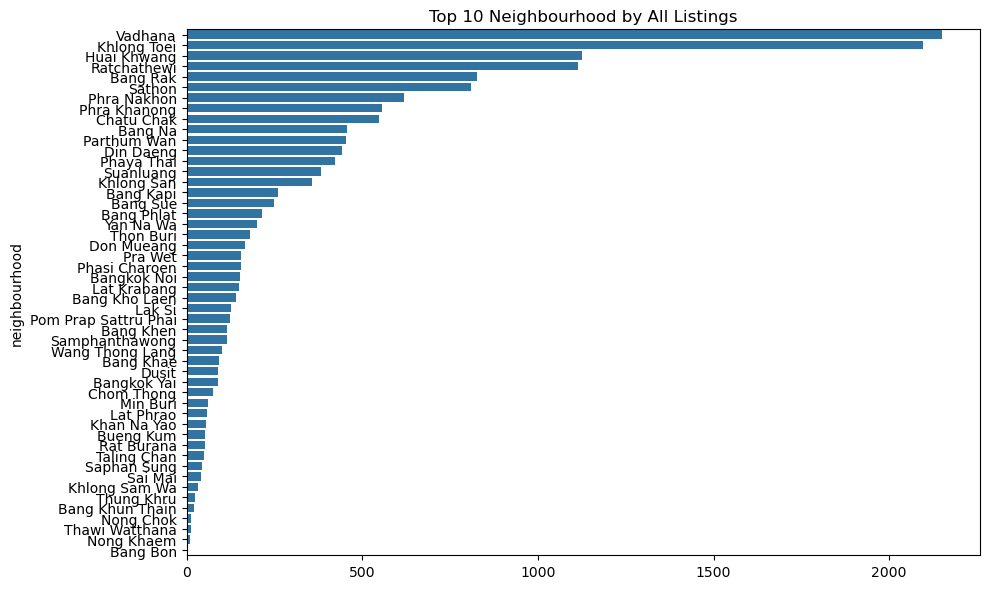

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(y=nbd_group.index, x=nbd_group.values)
plt.title("Top 10 Neighbourhood by All Listings")
plt.tight_layout()
plt.show()

# Data Analysis (Visualization and Statistics)

**Neighbourhood Average Price Analysis**

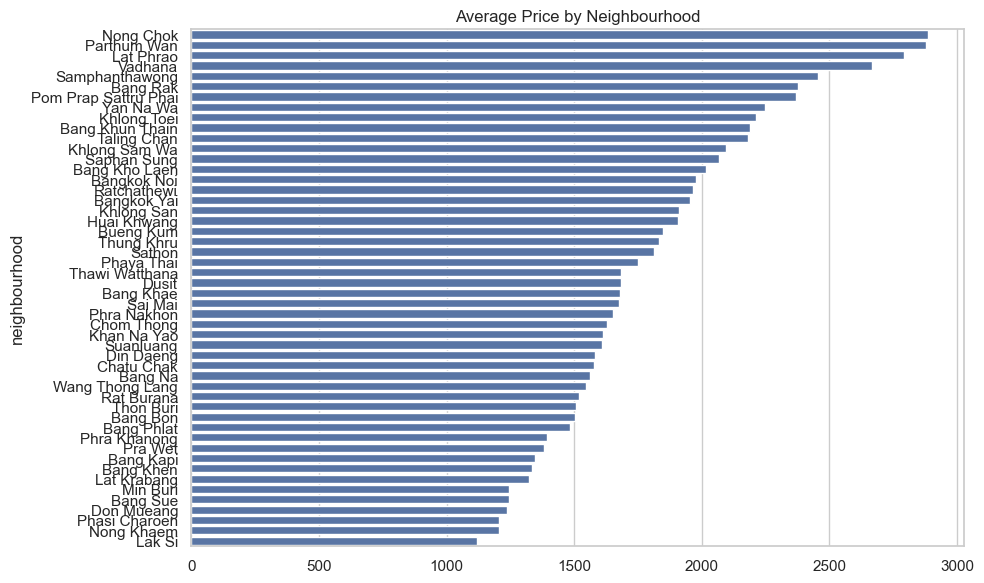

In [332]:
avgprice_nbd = airbnb2_df.groupby('neighbourhood')['price'].mean().round(0).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=avgprice_nbd.index, x=avgprice_nbd.values)
plt.title("Average Price by Neighbourhood")
plt.tight_layout()
plt.show()

In [302]:
anova_test =stats.f_oneway(*(airbnb2_df[airbnb2_df['neighbourhood'] == neighbourhood]['price'] for neighbourhood in airbnb2_df['neighbourhood'].unique()))
print(avgprice_nbd)
print(f"\nANOVA test result Average Price by Neighbourhood: F={anova_test.statistic}, p-value={anova_test.pvalue}")

neighbourhood
Nong Chok               2885.0
Parthum Wan             2879.0
Lat Phrao               2792.0
Vadhana                 2665.0
Samphanthawong          2456.0
Bang Rak                2377.0
Pom Prap Sattru Phai    2369.0
Yan Na Wa               2246.0
Khlong Toei             2213.0
Bang Khun Thain         2189.0
Name: price, dtype: float64

ANOVA test result Average Price by Neighbourhood: F=27.39219901984536, p-value=6.213277748557824e-238


**Availability by Price Group**

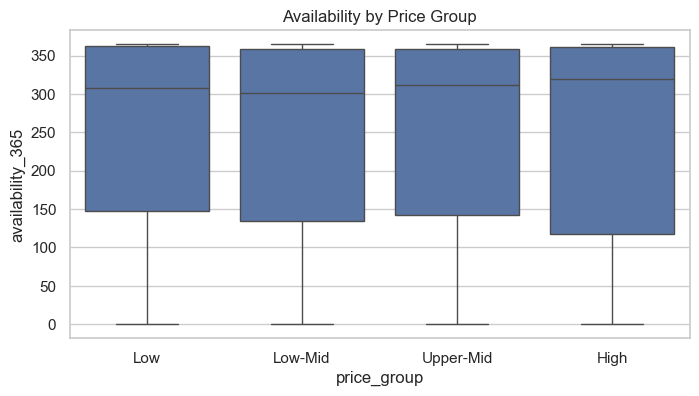

In [311]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price_group', y='availability_365', data=airbnb2_df)
plt.title('Availability by Price Group')
plt.show()

In [305]:
avail_price_avg = airbnb2_df.groupby('price_group')['availability_365'].mean().round(0)

anova_avail = stats.f_oneway(
    airbnb2_df[airbnb2_df['price_group'] == 'Low']['availability_365'],
    airbnb2_df[airbnb2_df['price_group'] == 'Low-Mid']['availability_365'],
    airbnb2_df[airbnb2_df['price_group'] == 'Upper-Mid']['availability_365'],
    airbnb2_df[airbnb2_df['price_group'] == 'High']['availability_365']
)
print(avail_price_avg)
print(f'\nANOVA reviews by price group: F={anova_avail.statistic}, p-value={anova_avail.pvalue}')

price_group
Low          248.0
Low-Mid      240.0
Upper-Mid    245.0
High         244.0
Name: availability_365, dtype: float64

ANOVA reviews by price group: F=2.910141403522167, p-value=0.03313021905503334


**Average Reviews by Price Group**

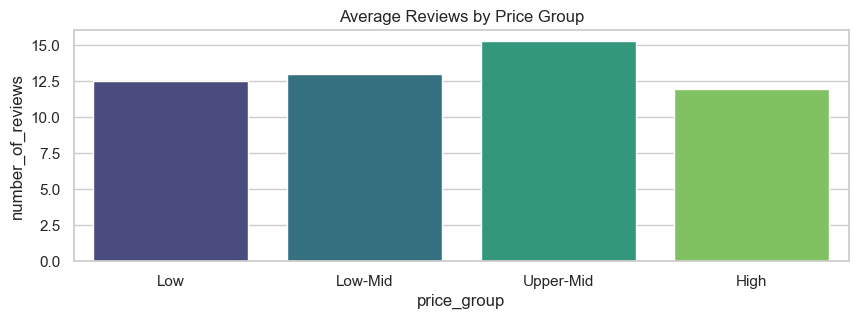

In [315]:
plt.figure(figsize=(10,3))
sns.barplot(x='price_group', y='number_of_reviews', data=ft_price, palette='viridis')
plt.title('Average Reviews by Price Group')
plt.show()

In [316]:
stats_anova = stats.f_oneway(airbnb2_df[airbnb2_df['price_group'] == 'Low']['availability_365'],
                             airbnb2_df[airbnb2_df['price_group'] == 'Low-Mid']['availability_365'],
                             airbnb2_df[airbnb2_df['price_group'] == 'Upper-Mid']['availability_365'],
                             airbnb2_df[airbnb2_df['price_group'] == 'High']['availability_365'])

print(f'\nANOVA statistic results for availability vs price groups: F = {stats_anova.statistic}, p={stats_anova.pvalue}')
if stats_anova.pvalue < 0.05:
    print ('There is significant difference between prices and room types of Bangkok Airbnb')
else:
    print ('No significant difference between prices and room types of Bangkok Airbnb')
    
print('\nCorrelation of Availability and Reviews by each price group: ')
for group in prc_labels:
    subset = airbnb2_df[airbnb2_df['price_group'] == group]
    correlation = subset[['number_of_reviews', 'availability_365']].corr().iloc[0,1]
    print(f'{group}: Correlation = {correlation:.2f}')


ANOVA statistic results for availability vs price groups: F = 2.910141403522167, p=0.03313021905503334
There is significant difference between prices and room types of Bangkok Airbnb

Correlation of Availability and Reviews by each price group: 
Low: Correlation = -0.09
Low-Mid: Correlation = -0.11
Upper-Mid: Correlation = -0.14
High: Correlation = -0.11


**Guest Review on Room Type**

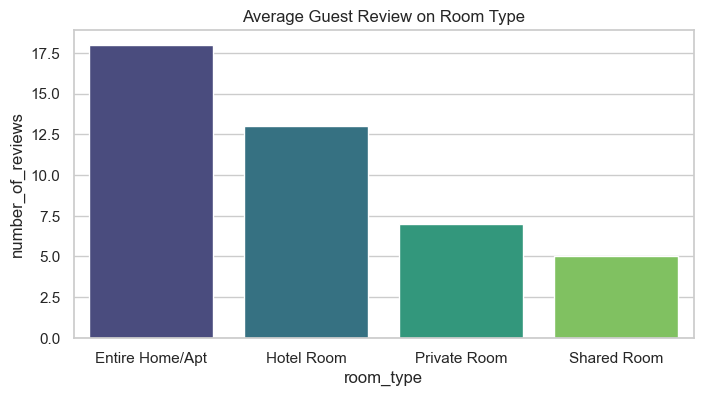

In [321]:
avgrev_room = airbnb2_df.groupby('room_type')['number_of_reviews'].mean().round(0).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avgrev_room, x='room_type', y='number_of_reviews', palette='viridis')
plt.title('Average Guest Review on Room Type')
plt.show()

In [322]:
anova_revroom = stats.f_oneway(
    airbnb2_df[airbnb2_df['room_type'] == 'Entire Home/Apt']['number_of_reviews'],
    airbnb2_df[airbnb2_df['room_type'] == 'Hotel Room']['number_of_reviews'],
    airbnb2_df[airbnb2_df['room_type'] == 'Private Room']['number_of_reviews'],
    airbnb2_df[airbnb2_df['room_type'] == 'Shared Room']['number_of_reviews']
)
print('ANOVA Result for Average Guest Review on Room Type: ', anova_revroom)

ANOVA Result for Average Guest Review on Room Type:  F_onewayResult(statistic=272.5645574720085, pvalue=1.6550426555191992e-172)


**Analysis of Multi Listings Hosts**

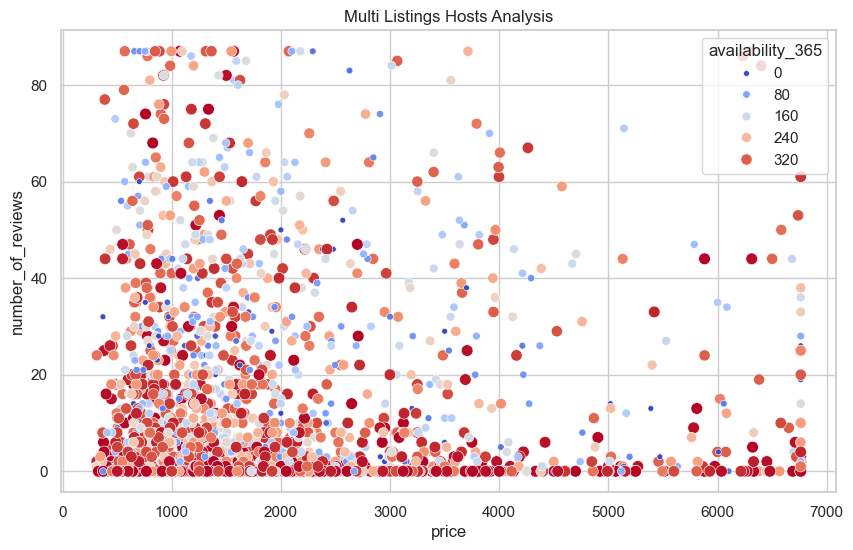

Multi Listings Hosts Summary:
            host_id   price  number_of_reviews  availability_365
count       2053.0  2053.0             2053.0            2053.0
mean   148247462.0  1910.0               14.0             250.0
std    133068112.0  1459.0               20.0             109.0
min        58920.0   308.0                0.0               0.0
25%     35923444.0   930.0                1.0             167.0
50%    108026474.0  1398.0                4.0             278.0
75%    231215655.0  2288.0               20.0             350.0
max    492273748.0  6762.0               87.0             365.0


In [328]:
multilist_host = airbnb2_df[airbnb2_df['calculated_host_listings_count'] >1]
multilist_stats = multilist_host.groupby('host_id').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).reset_index().round(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=multilist_stats, x='price', y='number_of_reviews', size='availability_365', hue='availability_365', palette='coolwarm')
plt.title('Multi Listings Hosts Analysis')
plt.show()

print('Multi Listings Hosts Summary:\n', multilist_stats.describe().round(0))

**Understand booking patterns monthly and review high demand of booking**

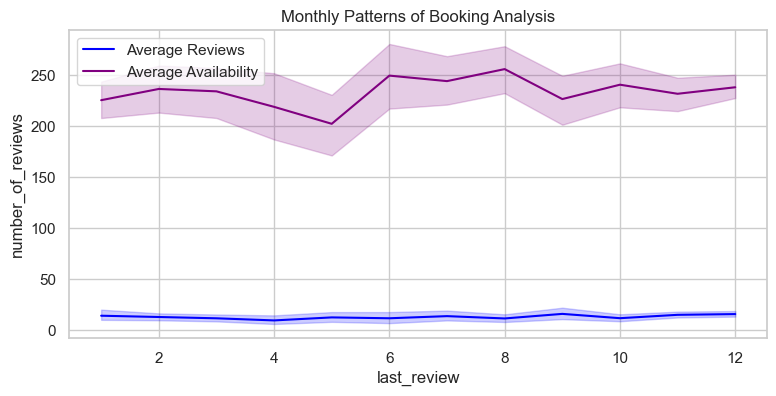

Monthly booking data summary:
                          last_review  number_of_reviews  availability_365
count                           1669             1669.0            1669.0
mean   2019-09-07 02:19:46.339124992               14.0             232.0
min              2012-12-15 00:00:00                1.0               0.0
25%              2018-03-16 00:00:00                2.0             174.0
50%              2019-09-04 00:00:00                6.0             236.0
75%              2021-06-14 00:00:00               18.0             346.0
max              2022-12-28 00:00:00              295.0             365.0
std                              NaN               22.0             109.0


In [330]:
last_review_month = pd.to_datetime(airbnb2_df['last_review']).dt.month

book_flow = airbnb_df.groupby('last_review').agg({
    'number_of_reviews': 'mean',
    'availability_365' : 'mean'
}).reset_index().round(0)

plt.figure(figsize=(9,4))
sns.lineplot(data=book_flow, x=last_review_month, y='number_of_reviews', label='Average Reviews', color='blue')
sns.lineplot(data=book_flow, x=last_review_month, y='availability_365', label='Average Availability', color='purple')
plt.title('Monthly Patterns of Booking Analysis')
plt.legend()
plt.show()

print('Monthly booking data summary:\n', book_flow.describe().round(0))

# *Key Findings*
* Some neighbourhoods lead the listing counts and showing significant variation in average prices, with ANOVA test indicating significant differences (F-statistic, p-value). Even the listings in lower-cost areas attract more audience with high availability of the room options, while the higher neighbourhoods with higher demands showing stronger demand also for higher level of audience.
* Hosts with multiple listings showing potential commercial operation within the neighbourhood, specially for room types (e.g entire home/apt) appear to set higher prices and receive more reviews, which more appealing for certain guest segments and more consistent on availability for the bookings. But the hosts with multiple listings, doesn't rnecessarily take all the spotlight, there're also space for other hosts to grow.
* Entire home/apt seems more appealing for the guests to book, indicating that they have more preferences for private and comfortable place to feel 'at home'. With ANOVA test results showing distinct review among room types, indicating different amount of guest satisfaction.
* Significant correlations exist between availability and reviews in specific price group, showing that higher demand often correlates with more guests feedback. Listings with lower price groups are often more available, giving the preference to budget-conscious travelers. For higher price options may be less available, due to high demand to those who willing to pay a premium.
* The fluctiations in availability and reviews ups and downs, reveal peak and low seasons, suggesting a strategy that balances availability with demand fluctuations.

# *Conclusions*

High-demand neighborhoods show significant price variation, with lower cost areas attracting budget-conscious guests and premium areas drawing those seeking more exclusive options. Hosts with multiple listings, especially for entire homes/apartments, are positioned for commercial advantage, appealing to guests who prioritize privacy and consistency. Entire homes are preferred, reflecting a demand for comfort and a ‘home-like’ experience, with review patterns differing by room type. Price group analysis reveals that lower cost listings have higher availability and attract more reviews, while premium options are often less available due to stronger demand. Seasonal availability and review fluctuations highlight peak and low periods, underscoring the need for dynamic booking strategies to align with demand.

# *Recommendation*
1. **For Host:** Focus more on the area with high demand or unique-offer neighbourhoods to optimize listings. Multiple listing hosts could offer a variety of room types. By mixing room types, these hosts can connect with both budget and premium guests, boosting occupancy and income. For example:
* Entire homes/apartments work for groups or families who’ll pay more for privacy.
* Private rooms attract solo travelers or couples who want something affordable but still private.
* Shared spaces fit budget travelers prioritizing cost over privacy.
2. **Price Strategy:** Consider dynamic pricing to maximize value and availability, especially during peak times.
3. **Guest Experience:** Encourage more guest feedback and take the feedback as consederation to grow the business. As guest review shows high correlation with higher availability, means positive guest experiences helps the listing's demand and reputation.
4. **Marketing:** Host should consider promoting listing differently during low or high demand seasons, potentially adjusting it to attract more guests.

